# THERMAL COMFORT Prediction

link to source : https://www.kaggle.com/claytonmiller/ashrae-global-thermal-comfort-database-ii

Target : Predicting Thermal Comfort of people in Singapore/Other Countries
Questions:
1. What is the TC in Sg vs other countries offices (Europe, South/East Asia, Australia, North, South America)?
2. What is the average humidity in Sg offices vs the rest?
3. What is the Aircon temperature in different countries?
4. Are males less tolerant to heat than females?

Random Forest multiclass
Multinomial logistic regression 
KNN 
Naive Bayes


Algorithm suggestion
6 and 5 is 1 everything 0 - simple, try first
Multiclass models (Random Forest multiclass, Multinomial logistic regression)
build 5 models

In [49]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline

originaldf =  pd.read_csv('ashrae_db2.01.csv')#Too many columns, reduce as many as possible
print (originaldf.columns)

Index(['Publication (Citation)', 'Data contributor', 'Year', 'Season',
       'Koppen climate classification', 'Climate', 'City', 'Country',
       'Building type', 'Cooling startegy_building level',
       'Cooling startegy_operation mode for MM buildings',
       'Heating strategy_building level', 'Age', 'Sex', 'Thermal sensation',
       'Thermal sensation acceptability', 'Thermal preference',
       'Air movement acceptability', 'Air movement preference',
       'Thermal comfort', 'PMV', 'PPD', 'SET', 'Clo', 'Met', 'activity_10',
       'activity_20', 'activity_30', 'activity_60', 'Air temperature (C)',
       'Air temperature (F)', 'Ta_h (C)', 'Ta_h (F)', 'Ta_m (C)', 'Ta_m (F)',
       'Ta_l (C)', 'Ta_l (F)', 'Operative temperature (C)',
       'Operative temperature (F)', 'Radiant temperature (C)',
       'Radiant temperature (F)', 'Globe temperature (C)',
       'Globe temperature (F)', 'Tg_h (C)', 'Tg_h (F)', 'Tg_m (C)', 'Tg_m (F)',
       'Tg_l (C)', 'Tg_l (F)', 'Relative humi

C:\Users\WHS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Part 1.0 : EDA - Shapes and Sizes, dtypes, isnull, correlation

In [55]:
originaldf

,Publication (Citation),Data contributor,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,...,Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F),Database
0,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
1,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
2,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
3,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
4,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107578,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107579,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107580,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107581,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1


In [56]:
originaldf.dtypes.head(30)

Publication (Citation)                               object
Data contributor                                     object
Year                                                float64
Season                                               object
Koppen climate classification                        object
Climate                                              object
City                                                 object
Country                                              object
Building type                                        object
Cooling startegy_building level                      object
Cooling startegy_operation mode for MM buildings     object
Heating strategy_building level                      object
Age                                                 float64
Sex                                                  object
Thermal sensation                                   float64
Thermal sensation acceptability                     float64
Thermal preference                      

In [53]:
originaldf.columns.tolist()

['Publication (Citation)',
 'Data contributor',
 'Year',
 'Season',
 'Koppen climate classification',
 'Climate',
 'City',
 'Country',
 'Building type',
 'Cooling startegy_building level',
 'Cooling startegy_operation mode for MM buildings',
 'Heating strategy_building level',
 'Age',
 'Sex',
 'Thermal sensation',
 'Thermal sensation acceptability',
 'Thermal preference',
 'Air movement acceptability',
 'Air movement preference',
 'Thermal comfort',
 'PMV',
 'PPD',
 'SET',
 'Clo',
 'Met',
 'activity_10',
 'activity_20',
 'activity_30',
 'activity_60',
 'Air temperature (C)',
 'Air temperature (F)',
 'Ta_h (C)',
 'Ta_h (F)',
 'Ta_m (C)',
 'Ta_m (F)',
 'Ta_l (C)',
 'Ta_l (F)',
 'Operative temperature (C)',
 'Operative temperature (F)',
 'Radiant temperature (C)',
 'Radiant temperature (F)',
 'Globe temperature (C)',
 'Globe temperature (F)',
 'Tg_h (C)',
 'Tg_h (F)',
 'Tg_m (C)',
 'Tg_m (F)',
 'Tg_l (C)',
 'Tg_l (F)',
 'Relative humidity (%)',
 'Humidity preference',
 'Humidity sensation

##### How many thermal comfort data is missing?

In [54]:
originaldf.isnull().sum() # Although alot of columns have missing data, the amount of available data is still useful 

Publication (Citation)                   451
Data contributor                           0
Year                                       0
Season                                   130
Koppen climate classification              0
                                       ...  
Door                                   33327
Heater                                 30516
Outdoor monthly air temperature (C)    12236
Outdoor monthly air temperature (F)    12238
Database                                   0
Length: 70, dtype: int64

In [84]:
df = originaldf.loc[originaldf['Thermal comfort'].isnull()==False]
df

,Publication (Citation),Data contributor,Year,Season,Koppen climate classification,Climate,City,Country,Building type,Cooling startegy_building level,...,Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F),Database
0,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
1,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
2,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
3,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
4,"Kwok, Alison G., and Chungyoon Chun. ""Thermal ...",Kwok Alison,2000.0,Summer,Cfa,Humid subtropical,Tokyo,Japan,Classroom,Air Conditioned,...,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,77.0,Database 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107578,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107579,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107580,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1
107581,"Kwok, A.G. ""Thermal Comfort in Tropical Classr...",Alison Kwok,1996.0,Winter,As,Tropical dry savanna,Honolulu,USA,Classroom,Air Conditioned,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Database 1


# Missing Values Treatment 

In [85]:
df.loc[df['Thermal comfort']=='Na','Thermal comfort'] = None #there are several columns with wrong dtypes
df.loc[df['Thermal comfort']==' ','Thermal comfort'] = None


C:\Users\WHS\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [87]:
df[['Thermal comfort']] = pd.to_numeric(df['Thermal comfort']) #all Thermal comfort has been changed to numeric 

C:\Users\WHS\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
df['Thermal comfort'].dtypes

dtype('float64')

In [89]:
df.columns.tolist()

['Publication (Citation)',
 'Data contributor',
 'Year',
 'Season',
 'Koppen climate classification',
 'Climate',
 'City',
 'Country',
 'Building type',
 'Cooling startegy_building level',
 'Cooling startegy_operation mode for MM buildings',
 'Heating strategy_building level',
 'Age',
 'Sex',
 'Thermal sensation',
 'Thermal sensation acceptability',
 'Thermal preference',
 'Air movement acceptability',
 'Air movement preference',
 'Thermal comfort',
 'PMV',
 'PPD',
 'SET',
 'Clo',
 'Met',
 'activity_10',
 'activity_20',
 'activity_30',
 'activity_60',
 'Air temperature (C)',
 'Air temperature (F)',
 'Ta_h (C)',
 'Ta_h (F)',
 'Ta_m (C)',
 'Ta_m (F)',
 'Ta_l (C)',
 'Ta_l (F)',
 'Operative temperature (C)',
 'Operative temperature (F)',
 'Radiant temperature (C)',
 'Radiant temperature (F)',
 'Globe temperature (C)',
 'Globe temperature (F)',
 'Tg_h (C)',
 'Tg_h (F)',
 'Tg_m (C)',
 'Tg_m (F)',
 'Tg_l (C)',
 'Tg_l (F)',
 'Relative humidity (%)',
 'Humidity preference',
 'Humidity sensation

In [90]:
df['Relative humidity (%)'].dtypes

dtype('float64')

In [309]:
df.loc[df['Air temperature (C)'].isnull(), 'Air temperature (C)'] = df['Air temperature (C)'].mean()
df.loc[df['Relative humidity (%)'].isnull(),'Relative humidity (%)'] = df['Relative humidity (%)'].mean()
df.loc[df['Air velocity (m/s)'].isnull(),'Air velocity (m/s)'] = df['Air velocity (m/s)'].mean()
df.loc[df['Thermal sensation'].isnull(),'Thermal sensation'] = df['Thermal sensation'].mean()
df.loc[df['Clo'].isnull(),'Clo'] = df['Clo'].mean()

C:\Users\WHS\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [310]:
df['Relative humidity (%)'].isnull().sum()

0

In [311]:
df.corr()#no strong correlation, need to consider more features e.g. cooling strategy

,Year,Age,Thermal sensation,Thermal sensation acceptability,Air movement acceptability,Thermal comfort,PMV,PPD,SET,Clo,...,Velocity_l (fpm),Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Outdoor monthly air temperature (F)
Year,1.000000,0.359685,0.032303,-0.051966,0.134301,0.061607,0.406830,0.156326,0.422910,0.132147,...,0.332654,-0.002587,0.142826,0.324707,-0.057337,-0.044106,-0.224157,0.229662,0.029664,0.028898
Age,0.359685,1.000000,0.105639,-0.082706,0.026655,0.055815,-0.018095,0.124794,0.003869,0.386387,...,-0.000015,-0.089396,0.243964,0.063594,-0.063770,0.098096,-0.136135,-0.611882,-0.233994,-0.234051
Thermal sensation,0.032303,0.105639,1.000000,-0.168963,-0.153670,-0.133140,0.397463,0.222782,0.347859,-0.145708,...,0.089601,-0.001203,0.065425,0.123994,0.283641,0.198068,0.098093,-0.150281,0.110771,0.110951
Thermal sensation acceptability,-0.051966,-0.082706,-0.168963,1.000000,0.327592,0.353823,-0.188426,-0.283081,-0.143652,-0.016230,...,-0.009874,0.042299,-0.018590,-0.039476,-0.177289,-0.062084,0.115528,0.016333,-0.083276,-0.083170
Air movement acceptability,0.134301,0.026655,-0.153670,0.327592,1.000000,0.461711,-0.050681,0.034773,-0.049593,0.004131,...,0.089970,0.165647,NaN,NaN,NaN,NaN,NaN,NaN,0.004058,0.003812
Thermal comfort,0.061607,0.055815,-0.133140,0.353823,0.461711,1.000000,-0.019898,-0.107520,0.025672,0.047168,...,-0.108292,-0.046992,0.002621,0.044066,-0.107474,-0.082968,0.022844,0.284921,0.072703,0.072089
PMV,0.406830,-0.018095,0.397463,-0.188426,-0.050681,-0.019898,1.000000,0.274234,0.951060,0.016309,...,0.284515,-0.035783,-0.025899,0.226479,0.567446,0.331733,0.079996,0.194443,0.409576,0.408489
PPD,0.156326,0.124794,0.222782,-0.283081,0.034773,-0.107520,0.274234,1.000000,0.224467,-0.198838,...,0.253351,-0.085623,-0.003460,-0.068930,0.513540,0.291020,-0.054431,-0.224899,0.173944,0.173142
SET,0.422910,0.003869,0.347859,-0.143652,-0.049593,0.025672,0.951060,0.224467,1.000000,0.177461,...,0.154730,-0.012936,-0.021554,0.223216,0.462587,0.267386,0.066088,0.202210,0.342800,0.342002
Clo,0.132147,0.386387,-0.145708,-0.016230,0.004131,0.047168,0.016309,-0.198838,0.177461,1.000000,...,-0.249004,-0.028614,0.032629,-0.329532,-0.263536,-0.202269,0.084244,0.068152,-0.364294,-0.364442


In [94]:
df.corr()['Thermal comfort'].sort_values()

Operative temperature (F)             -0.180484
Operative temperature (C)             -0.180453
Tg_l (F)                              -0.156839
Tg_l (C)                              -0.156679
Globe temperature (F)                 -0.151259
Globe temperature (C)                 -0.151228
Thermal sensation                     -0.140151
Ta_l (C)                              -0.126484
Ta_l (F)                              -0.126453
Velocity_m (fpm)                      -0.112467
Velocity_m (m/s)                      -0.112012
Tg_m (F)                              -0.109512
Tg_m (C)                              -0.109297
Velocity_l (fpm)                      -0.108292
Velocity_l (m/s)                      -0.107939
PPD                                   -0.107520
Fan                                   -0.107474
Tg_h (C)                              -0.104957
Tg_h (F)                              -0.104945
Ta_m (C)                              -0.098030
Air temperature (F)                   -0

In [312]:
df_simple = df[['Country', 'Building type', 'Cooling startegy_building level', 'Thermal comfort', 'Air temperature (C)', 'Relative humidity (%)','Air velocity (m/s)', 'Air movement acceptability', 'Thermal sensation', 'Clo']]
df_simple.shape

(36335, 10)

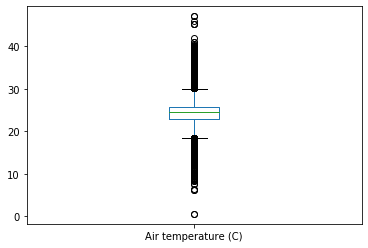

In [313]:
df_simple['Air temperature (C)'].plot(kind = 'box') # Outlier treatment required

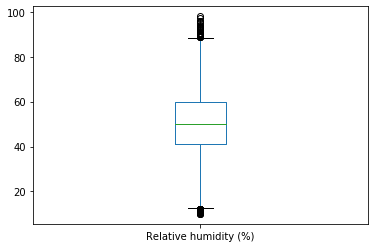

In [314]:
df_simple['Relative humidity (%)'].plot(kind = 'box')

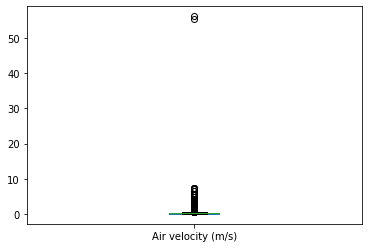

In [318]:
df_simple['Air velocity (m/s)'].plot(kind = 'box') # air velocity needs outlier treatment since doesnt make sense

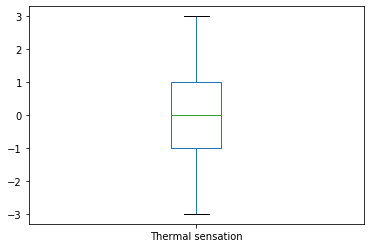

In [320]:
df_simple['Thermal sensation'].plot(kind = 'box') #OK

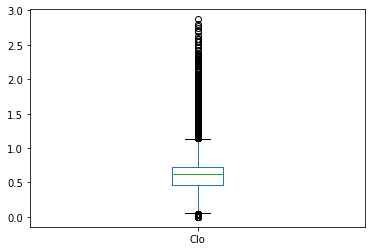

In [321]:
df_simple['Clo'].plot(kind = 'box') #need outlier treatment

In [316]:
df_simple['Air velocity (m/s)'].describe()

count    36335.000000
mean         0.214828
std          0.496931
min          0.000000
25%          0.070000
50%          0.190000
75%          0.214828
max         56.170000
Name: Air velocity (m/s), dtype: float64

In [317]:
df_simple.isnull().sum()

Country                                0
Building type                          0
Cooling startegy_building level      299
Thermal comfort                        7
Air temperature (C)                    0
Relative humidity (%)                  0
Air velocity (m/s)                     0
Air movement acceptability         31886
Thermal sensation                      0
Clo                                    0
dtype: int64

# Outlier Treatment

In [323]:
temp_q1 = df_simple['Air temperature (C)'].quantile(0.25)
temp_q3 = df_simple['Air temperature (C)'].quantile(0.75)
temp_iqr = temp_q3-temp_q1
df_simple.loc[(df_simple['Air temperature (C)']>(temp_q3+1.5*temp_iqr)) | (df_simple['Air temperature (C)']<(temp_q1-1.5*temp_iqr)),'Air temperature (C)'] = df_simple['Air temperature (C)'].mean()

rh_q1 = df_simple['Relative humidity (%)'].quantile(0.25)
rh_q3 = df_simple['Relative humidity (%)'].quantile(0.75)
rh_iqr = rh_q3-rh_q1
df_simple.loc[(df_simple['Relative humidity (%)']>(rh_q3+1.5*rh_q1)) | (df_simple['Relative humidity (%)']<(rh_q1-1.5*rh_iqr)),'Relative humidity (%)'] = df_simple['Relative humidity (%)'].mean()

velo_q1 = df_simple['Air velocity (m/s)'].quantile(0.25)
velo_q3 = df_simple['Air velocity (m/s)'].quantile(0.75)
velo_iqr = velo_q3-velo_q1
df_simple.loc[(df_simple['Air velocity (m/s)']>(velo_q3+1.5*velo_iqr)) | (df['Air velocity (m/s)']<(velo_q1-1.5*velo_iqr)),'Air velocity (m/s)']= df_simple['Air velocity (m/s)'].mean()

clo_q1 = df_simple['Clo'].quantile(0.25)
clo_q3 = df_simple['Clo'].quantile(0.75)
clo_iqr = clo_q3-clo_q1
df_simple.loc[(df_simple['Clo']>(clo_q3+1.5*clo_iqr)) | (df['Clo']<(clo_q1-1.5*clo_iqr)),'Clo']= df_simple['Clo'].mean()

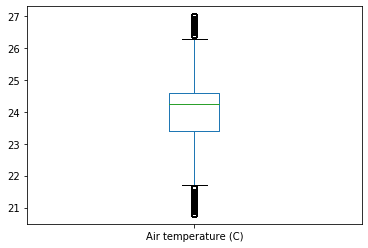

In [324]:
df_simple['Air temperature (C)'].plot(kind = 'box')


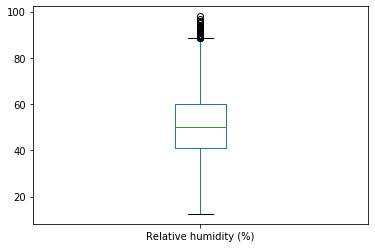

In [325]:
df_simple['Relative humidity (%)'].plot(kind = 'box')

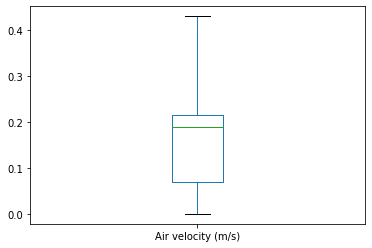

In [326]:
df_simple['Air velocity (m/s)'].plot(kind = 'box')

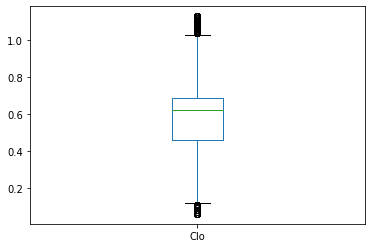

In [327]:
df_simple['Clo'].plot(kind = 'box')

In [328]:
df_simple['Air velocity (m/s)'].describe()

count    36335.000000
mean         0.156662
std          0.094334
min          0.000000
25%          0.070000
50%          0.190000
75%          0.214828
max          0.430000
Name: Air velocity (m/s), dtype: float64

In [329]:
df_simple

,Country,Building type,Cooling startegy_building level,Thermal comfort,Air temperature (C),Relative humidity (%),Air velocity (m/s),Air movement acceptability,Thermal sensation,Clo
0,Japan,Classroom,Air Conditioned,5.0,24.200000,50.2,0.060000,1.0,-0.5,0.25
1,Japan,Classroom,Air Conditioned,5.0,24.200000,50.2,0.060000,1.0,-2.1,0.25
2,Japan,Classroom,Air Conditioned,6.0,24.200000,50.2,0.060000,1.0,0.5,0.27
3,Japan,Classroom,Air Conditioned,4.0,24.200000,50.2,0.060000,1.0,-2.5,0.23
4,Japan,Classroom,Air Conditioned,6.0,24.200000,50.2,0.060000,1.0,-0.5,0.34
...,...,...,...,...,...,...,...,...,...,...
107578,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-2.1,0.59
107579,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-0.5,0.44
107580,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-1.0,0.37
107581,USA,Classroom,Air Conditioned,4.0,24.599787,67.4,0.214828,NaN,1.0,0.80


# Part 1.1 Understanding categorical data through grouping

In [330]:
df_simple.groupby(['Building type','Cooling startegy_building level'])['Cooling startegy_building level'].agg(['count'])
# Most classrooms surveyed are NV
# Most houses surveyed are NV
# Most Offices surveyed are AC
# Senior Center are mixed mode

count
Building type       Cooling startegy_building level       
Classroom           Air Conditioned                   2394
                    Mixed Mode                         777
                    Naturally Ventilated              5373
Multifamily housing Air Conditioned                     26
                    Mixed Mode                        1057
                    Naturally Ventilated              3043
Office              Air Conditioned                   7787
                    Mixed Mode                        8767
                    Naturally Ventilated              3542
Others              Air Conditioned                   1308
                    Mixed Mode                        1001
                    Naturally Ventilated               460
Senior center       Mixed Mode                         501

##### What's the average thermal comfort by building type and cooling strategy?

In [331]:
df.groupby(['Building type','Cooling startegy_building level'])['Thermal comfort'].mean()# Classrooms are least comfortable, Senior Center most comfortable

Building type        Cooling startegy_building level
Classroom            Air Conditioned                    3.860309
                     Mixed Mode                         3.828829
                     Naturally Ventilated               4.051220
Multifamily housing  Air Conditioned                    3.615385
                     Mixed Mode                         3.018827
                     Naturally Ventilated               4.116333
Office               Air Conditioned                    4.677064
                     Mixed Mode                         4.497719
                     Naturally Ventilated               4.598532
Others               Air Conditioned                    4.337920
                     Mixed Mode                         3.879121
                     Naturally Ventilated               3.947826
Senior center        Mixed Mode                         4.560878
Name: Thermal comfort, dtype: float64

##### What's the average thermal comfort by country

In [373]:
df.groupby('Country')['Thermal comfort'].mean().sort_values() #Singapore is least comfortable

Country
Singapore      3.362319
Denmark        3.400000
UK             3.585462
Japan          3.592039
China          3.710535
Tunisia        3.906860
Germany        4.122966
Canada         4.302647
USA            4.342022
Australia      4.576435
Italy          4.671378
India          4.739340
Philippines    4.826087
Nigeria        4.903509
Brazil              NaN
Name: Thermal comfort, dtype: float64

##### What's the average air temp, RH, and Air velocity of different buildings in different countries

In [333]:
df.groupby(['Country' ,'Building type'])[['Air temperature (C)','Relative humidity (%)'
                                                                ,'Air velocity (m/s)']].mean()

Air temperature (C)  Relative humidity (%)  \
Country     Building type                                                     
Australia   Office                         23.064756              47.950692   
            Senior center                  22.813373              48.090818   
Brazil      Classroom                      24.100000              69.700000   
Canada      Office                         23.087805              29.480488   
            Others                         23.515248              33.906989   
China       Classroom                      24.665829              50.150587   
            Multifamily housing            28.034756              46.512985   
            Office                         26.363910              45.181203   
            Others                         25.923877              60.244846   
Denmark     Classroom                      24.313529              42.650588   
Germany     Office                         25.177577              47.285402   
India       Classroom                      26.285106              43.824468   
            Multifamily housing            26.629678              45.211169   
            Office                         26.020254              53.155215   
            Others                         26.516175              35.025502   
Italy       Classroom                      27.611472              36.666023   
            Office                         24.801320              35.957144   
Japan       Classroom                      25.671622              63.543243   
            Multifamily housing            24.078193              55.290966   
Nigeria     Multifamily housing            34.743854              68.576796   
Philippines Office                         23.749275              47.360870   
Singapore   Office                         23.288889              58.236715   
Tunisia     Multifamily housing            23.269843              57.647073   
            Office                         23.422243              58.724752   
UK          Multifamily housing            21.180542              58.695928   
USA         Classroom                      24.599787              62.068059   
            Office                         23.353010              44.455314   

                                 Air velocity (m/s)  
Country     Building type                            
Australia   Office                         0.143356  
            Senior center                  0.129960  
Brazil      Classroom                      0.060000  
Canada      Office                         0.104146  
            Others                         0.084511  
China       Classroom                      0.261150  
            Multifamily housing            0.384797  
            Office                         0.289248  
            Others                         0.274220  
Denmark     Classroom                      0.214828  
Germany     Office                         0.083291  
India       Classroom                      0.296277  
            Multifamily housing            0.440252  
            Office                         0.232363  
            Others                         0.412645  
Italy       Classroom                      0.043358  
            Office                         0.768240  
Japan       Classroom                      0.187768  
            Multifamily housing            0.214828  
Nigeria     Multifamily housing            0.213321  
Philippines Office                         0.144783  
Singapore   Office                         0.179565  
Tunisia     Multifamily housing            0.271674  
            Office                         0.303407  
UK          Multifamily housing            0.214828  
USA         Classroom                      0.214828  
            Office                         0.108481

##### What's the average air temp, RH, and Air velocity of different countries

In [371]:
#Grouping by multiple category
df.groupby(['Country'])[['Thermal comfort','Air temperature (C)','Relative humidity (%)'
                                                                ,'Air velocity (m/s)' ,'Clo']].mean() #Nigeria is the hottest, yet has highest TC

,Thermal comfort,Air temperature (C),Relative humidity (%),Air velocity (m/s),Clo
Country,,,,,
Australia,4.576435,23.026707,47.971901,0.141328,0.619384
Brazil,NaN,24.100000,69.700000,0.060000,0.300000
Canada,4.302647,23.474914,33.489298,0.086364,0.721634
China,3.710535,25.186465,51.566681,0.273635,0.654637
Denmark,3.400000,24.313529,42.650588,0.214828,0.635217
Germany,4.122966,25.177577,47.285402,0.083291,0.470031
India,4.739340,26.182828,49.963541,0.288533,0.693690
Italy,4.671378,25.407042,36.109941,0.611994,0.633357
Japan,3.592039,24.242877,56.143855,0.212032,0.617871


##### What's the average air temp, RH, and Air velocity of different buildings

In [370]:
df.groupby(['Building type'])[['Thermal comfort','Air temperature (C)','Relative humidity (%)'
                                                                ,'Air velocity (m/s)', 'Clo' ]].mean() 

,Thermal comfort,Air temperature (C),Relative humidity (%),Air velocity (m/s),Clo
Building type,,,,,
Classroom,3.977510,24.678916,54.897066,0.239187,0.582362
Multifamily housing,3.789130,25.388255,51.228158,0.339012,0.552898
Office,4.584982,24.323983,48.608218,0.172655,0.677729
Others,4.107259,25.420477,45.044890,0.262644,0.577642
Senior center,4.560878,22.813373,48.090818,0.129960,0.876667


In [336]:
temp = df.loc[(df.Country=='Singapore') | (df.Country=='Nigeria')]
temp.groupby(['Country'])[['Thermal comfort','Air temperature (C)','Relative humidity (%)','Air velocity (m/s)' ]].mean() 
#Compare nigeeia and singapore

,Thermal comfort,Air temperature (C),Relative humidity (%),Air velocity (m/s)
Country,,,,
Nigeria,4.903509,34.743854,68.576796,0.213321
Singapore,3.362319,23.288889,58.236715,0.179565


## EDA grouping conclusion

Most classrooms surveyed are NV.
Most houses surveyed are NV.
Most Offices surveyed are AC.
Senior Center are mixed mode.

Singapore offices has the lowest surveyed Thermal Comfort at 3.36. International average is 4.31 (all building types) and 4.58(just offices)

Singapore offices has one of the highest RH at 66.2%. International average is 47.5% (all building types) and 44.3%(just offices)

Singapore office average air temperature is 26.6C.International average is 24.5C (all building types) and 24.3C(just offices)

Singapore office average air speed of 0.185 m/s. International average is 0.175 m/s(all building types) and 0.135 m/s(just offices)

It is known that Temperature, Relative Humidity, and Air Velocity affects thermal comfort.

Interesting to see Nigeria in comparison with Singapore. Both have similarly high temperature, high Relative Humidity and low air velocity, but yet Nigeria has the highest Thermal Comfort, yet Singapore has the lowest Thermal Comfort
However, note the data from Nigeria is for Multi-Family Housing while Singapore is on Offices. 

# Part 1.2 EDA through Graphs

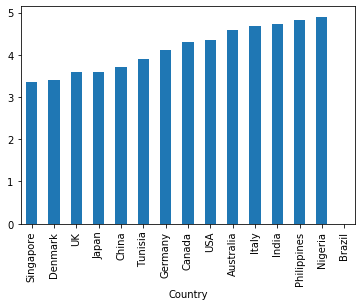

In [337]:
plot1 = df.groupby('Country')['Thermal comfort'].mean().sort_values()
plot1.plot(kind = 'bar')

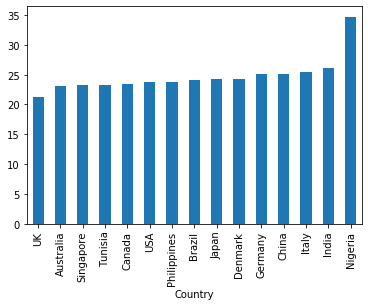

In [338]:
plot2 = df.groupby('Country')['Air temperature (C)'].mean().sort_values()
plot2.plot(kind = 'bar')

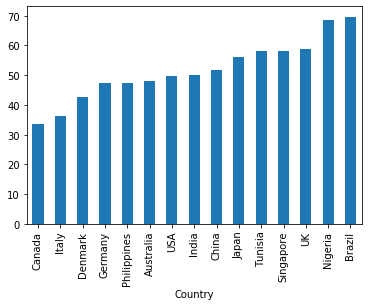

In [339]:
plot3 = df.groupby('Country')['Relative humidity (%)'].mean().sort_values()
plot3.plot(kind = 'bar')

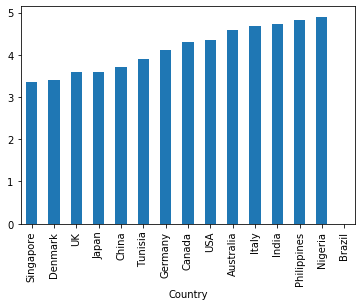

In [340]:
plot4 = df.groupby('Country')['Thermal comfort'].mean().sort_values()
plot4.plot(kind = 'bar')

# Part 1.3 Vectorisation/Bucketization for categorical items

In [343]:

coolingstrat = pd.get_dummies(df_simple['Cooling startegy_building level'].tolist(), prefix = 'cooling')
coolingstrat.index = df.index
coolingstrat


,cooling_Air Conditioned,cooling_Mixed Mode,cooling_Naturally Ventilated
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
107578,1,0,0
107579,1,0,0
107580,1,0,0
107581,1,0,0


In [342]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
coolingstrat = np.array(df['Cooling startegy_building level'].tolist())
coolingstrat_arr = coolingstrat.reshape(-1,1)
enc.fit(coolingstrat)

ValueError: Expected 2D array, got 1D array instead:
array=['Air Conditioned' 'Air Conditioned' 'Air Conditioned' ...
 'Air Conditioned' 'Air Conditioned' 'Air Conditioned'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [344]:
df_simple2 = df_simple.join(coolingstrat)
df_simple2

,Country,Building type,Cooling startegy_building level,Thermal comfort,Air temperature (C),Relative humidity (%),Air velocity (m/s),Air movement acceptability,Thermal sensation,Clo,cooling_Air Conditioned,cooling_Mixed Mode,cooling_Naturally Ventilated
0,Japan,Classroom,Air Conditioned,5.0,24.200000,50.2,0.060000,1.0,-0.5,0.25,1,0,0
1,Japan,Classroom,Air Conditioned,5.0,24.200000,50.2,0.060000,1.0,-2.1,0.25,1,0,0
2,Japan,Classroom,Air Conditioned,6.0,24.200000,50.2,0.060000,1.0,0.5,0.27,1,0,0
3,Japan,Classroom,Air Conditioned,4.0,24.200000,50.2,0.060000,1.0,-2.5,0.23,1,0,0
4,Japan,Classroom,Air Conditioned,6.0,24.200000,50.2,0.060000,1.0,-0.5,0.34,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107578,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-2.1,0.59,1,0,0
107579,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-0.5,0.44,1,0,0
107580,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-1.0,0.37,1,0,0
107581,USA,Classroom,Air Conditioned,4.0,24.599787,67.4,0.214828,NaN,1.0,0.80,1,0,0


In [346]:
btype = pd.get_dummies(df_simple['Building type'].tolist(), prefix = 'btype')
btype.index = df_simple.index

btype

,btype_Classroom,btype_Multifamily housing,btype_Office,btype_Others,btype_Senior center
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
107578,1,0,0,0,0
107579,1,0,0,0,0
107580,1,0,0,0,0
107581,1,0,0,0,0


In [347]:
df_simple3 = df_simple2.join(btype)
df_simple3

,Country,Building type,Cooling startegy_building level,Thermal comfort,Air temperature (C),Relative humidity (%),Air velocity (m/s),Air movement acceptability,Thermal sensation,Clo,cooling_Air Conditioned,cooling_Mixed Mode,cooling_Naturally Ventilated,btype_Classroom,btype_Multifamily housing,btype_Office,btype_Others,btype_Senior center
0,Japan,Classroom,Air Conditioned,5.0,24.200000,50.2,0.060000,1.0,-0.5,0.25,1,0,0,1,0,0,0,0
1,Japan,Classroom,Air Conditioned,5.0,24.200000,50.2,0.060000,1.0,-2.1,0.25,1,0,0,1,0,0,0,0
2,Japan,Classroom,Air Conditioned,6.0,24.200000,50.2,0.060000,1.0,0.5,0.27,1,0,0,1,0,0,0,0
3,Japan,Classroom,Air Conditioned,4.0,24.200000,50.2,0.060000,1.0,-2.5,0.23,1,0,0,1,0,0,0,0
4,Japan,Classroom,Air Conditioned,6.0,24.200000,50.2,0.060000,1.0,-0.5,0.34,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107578,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-2.1,0.59,1,0,0,1,0,0,0,0
107579,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-0.5,0.44,1,0,0,1,0,0,0,0
107580,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-1.0,0.37,1,0,0,1,0,0,0,0
107581,USA,Classroom,Air Conditioned,4.0,24.599787,67.4,0.214828,NaN,1.0,0.80,1,0,0,1,0,0,0,0


In [348]:
df_simple3.isnull().sum()

Country                                0
Building type                          0
Cooling startegy_building level      299
Thermal comfort                        7
Air temperature (C)                    0
Relative humidity (%)                  0
Air velocity (m/s)                     0
Air movement acceptability         31886
Thermal sensation                      0
Clo                                    0
cooling_Air Conditioned                0
cooling_Mixed Mode                     0
cooling_Naturally Ventilated           0
btype_Classroom                        0
btype_Multifamily housing              0
btype_Office                           0
btype_Others                           0
btype_Senior center                    0
dtype: int64

# Part 2.0 : Fit, Predict, Test Goodness of Fit

# Part 2.1 : Try Smaller TC Bucket. TC 5-6 = 1, Else 0 

##### Random Forest

In [349]:
df_simple3['TC_bucket'] = df_simple3['Thermal comfort'].apply(lambda x:1 if x>4 else 0)
df_simple3

,Country,Building type,Cooling startegy_building level,Thermal comfort,Air temperature (C),Relative humidity (%),Air velocity (m/s),Air movement acceptability,Thermal sensation,Clo,cooling_Air Conditioned,cooling_Mixed Mode,cooling_Naturally Ventilated,btype_Classroom,btype_Multifamily housing,btype_Office,btype_Others,btype_Senior center,TC_bucket
0,Japan,Classroom,Air Conditioned,5.0,24.200000,50.2,0.060000,1.0,-0.5,0.25,1,0,0,1,0,0,0,0,1
1,Japan,Classroom,Air Conditioned,5.0,24.200000,50.2,0.060000,1.0,-2.1,0.25,1,0,0,1,0,0,0,0,1
2,Japan,Classroom,Air Conditioned,6.0,24.200000,50.2,0.060000,1.0,0.5,0.27,1,0,0,1,0,0,0,0,1
3,Japan,Classroom,Air Conditioned,4.0,24.200000,50.2,0.060000,1.0,-2.5,0.23,1,0,0,1,0,0,0,0,0
4,Japan,Classroom,Air Conditioned,6.0,24.200000,50.2,0.060000,1.0,-0.5,0.34,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107578,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-2.1,0.59,1,0,0,1,0,0,0,0,1
107579,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-0.5,0.44,1,0,0,1,0,0,0,0,1
107580,USA,Classroom,Air Conditioned,5.0,24.599787,67.4,0.214828,NaN,-1.0,0.37,1,0,0,1,0,0,0,0,1
107581,USA,Classroom,Air Conditioned,4.0,24.599787,67.4,0.214828,NaN,1.0,0.80,1,0,0,1,0,0,0,0,0


In [361]:
X = df_simple3[['Air temperature (C)','Relative humidity (%)','Air velocity (m/s)', 'Thermal sensation', 'Clo',
                'cooling_Air Conditioned', 'cooling_Mixed Mode' ,'cooling_Naturally Ventilated',
               'btype_Classroom', 'btype_Multifamily housing', 'btype_Office', 'btype_Others', 'btype_Senior center']]
y = df_simple3['TC_bucket']

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
rfreg = RandomForestClassifier(n_estimators=50, max_features=8, oob_score=True, random_state=1)

scores = cross_val_score(rfreg, X, y, cv=3, scoring='precision')
#Random Forest/Tree based variables - can use more X
#XGBoost, GBM, Maybe Deep Neural Network
#Treat TC as multi class

In [352]:
print(scores)

[0.52491849 0.59068979 0.61841554]


##### Gradient Boosing Classifier

In [353]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
scores = cross_val_score(clf, X, y, cv=3, scoring='precision')

In [354]:
print(scores)

[0.5246767  0.62131615 0.61980198]


##### Decision Tree Classifier

In [355]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=3)
scores = cross_val_score(decisiontree, X, y, cv=3)
print(scores)

[0.45574637 0.51527411 0.53405995]


##### Neural Network

In [356]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(random_state=1, max_iter=300)
scores = cross_val_score(nn, X, y, cv=3)
print(scores)

[0.48844122 0.60518494 0.57245479]


# Part 2.2 : Use TC as 1-6 - Floor the TC Value first

In [362]:
df_simple3.dropna(subset=['Thermal comfort'], inplace = True)
df_simple3.shape #somehow there are still 7 missing TC data?

(36328, 20)

In [363]:
import math
df_simple3['TC_bucket2'] = df_simple3['Thermal comfort'].apply(lambda x: math.floor(x))
df_simple3['TC_bucket2'].value_counts()

5    13655
4     6553
6     6010
3     5307
2     3965
1      834
0        4
Name: TC_bucket2, dtype: int64

##### Random Forest

In [364]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score

rfreg = RandomForestClassifier(n_estimators=50, max_features=6, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_test)
print (accuracy_score(y_test, y_pred))
print (precision_score(y_test, y_pred, average = 'weighted'))
print (recall_score(y_test, y_pred, average = 'weighted'))


0.7005064963664391
0.6989456734338827
0.7005064963664391


##### Gradient Boosting

In [365]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.6533803127064524


##### Decision Tree

In [366]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=3)
decisiontree.fit(X_train, y_train)
y_pred = decisiontree.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.6488658885707994


In [367]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(random_state=1, max_iter=300)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.6790354547456507


# Conclusion

Trialling different features gives very good insight. Although it's not obvious from df.corr(), Thermal Sensation and Clothing Factor boosted the accuracy scores in the Part 2.2. Random Forest was the best performing model with 70.05% Accuracy.